In [1]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from getdist import *

# import planckStyle
import pylab
import numpy as np
# import tkinter
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker

# import corner 
# # matplotlib.use('TkAgg')
%matplotlib inline

### In all the cases, we use multi mode in dynesty with dlogz=0.01 as stopping criterion.

Default: Batch size 64, nodes 100, nlayers 4, learning rate 0.01, ADAM. 1000 epochs with stopping criterion of valid_loss <= 0.01.

If we do not indicate otherwise, the neural networks start to training when the number of samples is equal to nlive/2. 

In [2]:
dir_name = '/home/isidro/Documents/github/cosmo_tools/models/neural/neuralike/chains/'


## SERVER: waCDM CBAO+Pantheon+HD, 8 proc, 1000 live points. (without dead points and without stopping criterion in trainning). 

Repeating these runs in the server.

Repetir las dos corridas con red neuronal con las nuevas modificaciones nlive/2 dead points, y loss_train <= 0.01, loss_val <= 0.01, epochs >= 500.

16 batch size, 100 neuronas, 4 capas, LR 0.01, 1000 epocas

EN PROCESO

CORRIENDO A dlogz_start = 50

Calcula mejor logz neuralike que neuraliee+GA

valid_loss = 0.5




<Figure size 720x648 with 0 Axes>

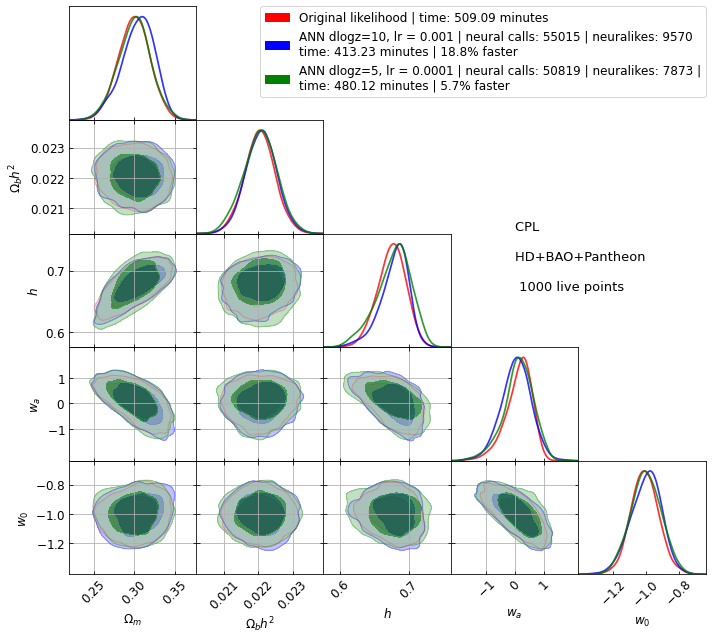

In [16]:
roots1 = ['waCDM_phy_CBAO+Pantheon+HD_nested_multi',
#           'waCDM_phy_HD+CBAO+Pantheon_nested_multi_neuralike',
#           'waCDM_phy_CBAO+HD+Pantheon_nested_multi_neuralike',
          'waCDM_phy_CBAO+Pantheon+HD_nested_multi_neuralike',
          'waCDM_phy_CBAO+HD+Pantheon_nested_multi_neuralike_dlogz5',
         ]

g = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.3,
                                             'smooth_scale_1D': 0.3, 
                                             'ignore_rows': 0.0})

#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


g.triangle_plot(roots1, ['Om','Obh2', 'h', 'wa', 'w'],                           
                diag1d_kwargs={'colors':['red', 'blue', 'green', 'purple', 'orange'], 
                               'alphas':[0.8, 0.8, 0.8]},
                colors=['red', 'blue', 'green', 'purple', 'orange'],
                alphas = [0.4, 0.6, 0.6],
                legend_labels=['Original likelihood | time: 509.09 minutes' , 
#                                'ANN dlogz=50, neural calls: 79968 | neuralikes: 13069 | \n'
#                                    'lr=0.001 | time: 358.67 minutes', 
#                                'ANN dlogz=20| neural calls: 63968 | neuralikes: 11024\n
#                                  'time: 400.063 ',
                               'ANN dlogz=10, lr = 0.001 | neural calls: 55015 | neuralikes: 9570\n'
                               'time: 413.23 minutes | 18.8% faster',
                               'ANN dlogz=5, lr = 0.0001 | neural calls: 50819 | neuralikes: 7873 |\n'
                               'time: 480.12 minutes | 5.7% faster'
                              ],
                legend_loc='upper right',
                filled = True,
                normalized=False, shaded=False, 
#                 param_limits={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]},
                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

g.subplots[1,0].grid(True)
g.subplots[2,0].grid(True)
g.subplots[2,1].grid(True)
g.subplots[3,0].grid(True)
g.subplots[3,1].grid(True)
g.subplots[3,2].grid(True)
g.subplots[4,0].grid(True)
g.subplots[4,1].grid(True)
g.subplots[4,2].grid(True)
g.subplots[4,3].grid(True)


g.add_text('CPL \n\nHD+BAO+Pantheon \n\n 1000 live points', x= -0.5, y=2.8, fontsize=13)

plt.savefig("wacdm_neuralike_corner.png", dpi=100)

### The same + genetic

Mejora precisión, empeora tiempo neuralike

<Figure size 720x648 with 0 Axes>

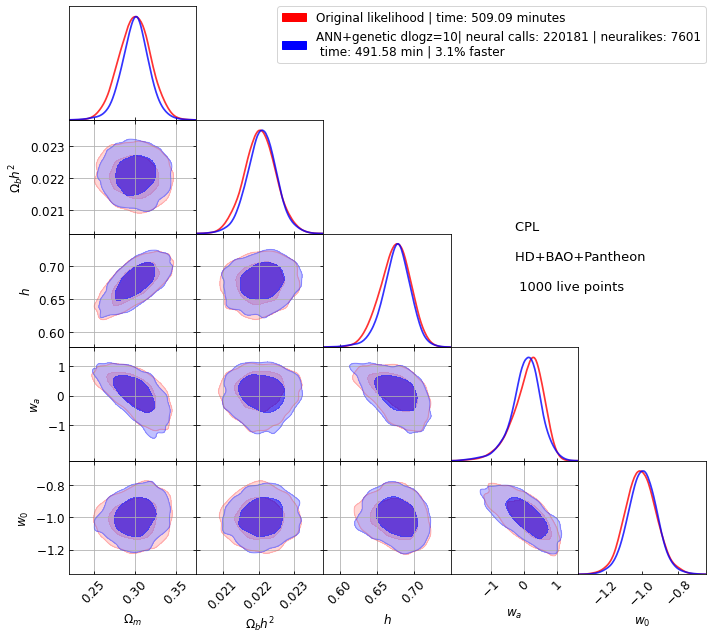

In [15]:
roots2 = ['waCDM_phy_CBAO+Pantheon+HD_nested_multi',
#           'waCDM_phy_CBAO+Pantheon+HD_nested_multi_neuralike_genetic',
#           'waCDM_phy_CBAO+HD+Pantheon_nested_multi_neuralike_genetic',
          'waCDM_phy_HD+CBAO+Pantheon_nested_multi_neuralike_genetic'
         ]

g = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.3,
                                             'smooth_scale_1D': 0.3, 
                                             'ignore_rows': 0.0})

#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


g.triangle_plot(roots2, ['Om','Obh2', 'h', 'wa', 'w'],                           
                diag1d_kwargs={'colors':['red', 'blue', 'green', 'purple'], 
                               'alphas':[0.8, 0.8, 0.8]},
                colors=['red', 'blue', 'green', 'purple'],
                alphas = [0.4, 0.6, 0.6],
                legend_labels=['Original likelihood | time: 509.09 minutes' , 
#                                'ANN dlogz=50 | time: 484.04 min', 
#                                'ANN dlogz=20| time: 452.77 min ', 
                               'ANN+genetic dlogz=10| neural calls: 220181 | neuralikes: 7601\n '
                               'time: 491.58 min | 3.1% faster'
                              ],
                legend_loc='upper right',
                filled = True,
                normalized=False, shaded=False, 
#                 param_limits={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]},
                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

g.subplots[1,0].grid(True)
g.subplots[2,0].grid(True)
g.subplots[2,1].grid(True)
g.subplots[3,0].grid(True)
g.subplots[3,1].grid(True)
g.subplots[3,2].grid(True)
g.subplots[4,0].grid(True)
g.subplots[4,1].grid(True)
g.subplots[4,2].grid(True)
g.subplots[4,3].grid(True)


g.add_text('CPL \n\nHD+BAO+Pantheon \n\n 1000 live points', x= -0.5, y=2.8, fontsize=13)

plt.savefig('neural_genetic.png', dpi=100)

In [11]:
1-491.58/509.09

0.03439470427625757

### Only genetic, generating 1000 initial live points. Does not improve the time.

100 population, 10 generations.

<Figure size 720x648 with 0 Axes>

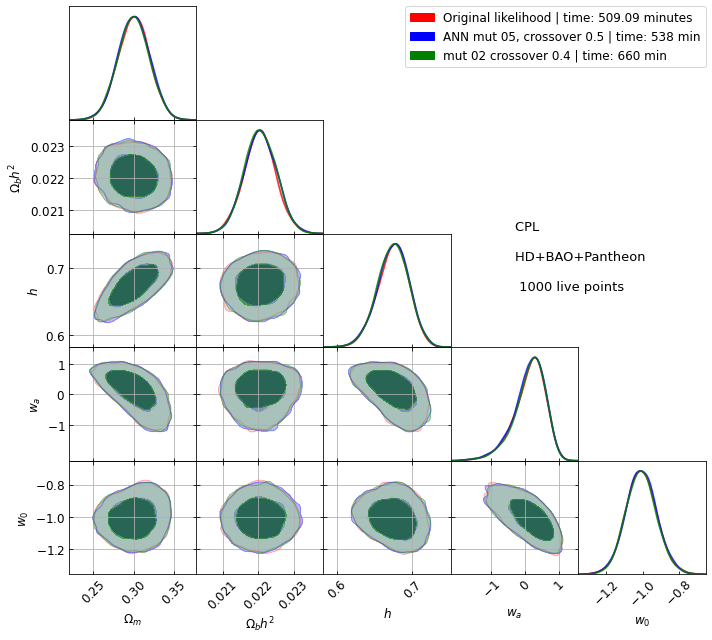

In [17]:
roots3 = ['waCDM_phy_CBAO+Pantheon+HD_nested_multi',
           'waCDM_phy_CBAO+HD+Pantheon_nested_multi_genetic',
           'waCDM_phy_CBAO+Pantheon+HD_nested_multi_genetic',
          
         ]

g = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.3,
                                             'smooth_scale_1D': 0.3, 
                                             'ignore_rows': 0.0})

#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


g.triangle_plot(roots3, ['Om','Obh2', 'h', 'wa', 'w'],                           
                diag1d_kwargs={'colors':['red', 'blue', 'green', 'purple'], 
                               'alphas':[0.8, 0.8, 0.8]},
                colors=['red', 'blue', 'green', 'purple'],
                alphas = [0.4, 0.6, 0.6],
                legend_labels=['Original likelihood | time: 509.09 minutes' , 
                               'ANN mut 05, crossover 0.5 | time: 538 min', 
                               'mut 02 crossover 0.4 | time: 660 min'
                              ],
                legend_loc='upper right',
                filled = True,
                normalized=False, shaded=False, 
#                 param_limits={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]},
                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

g.subplots[1,0].grid(True)
g.subplots[2,0].grid(True)
g.subplots[2,1].grid(True)
g.subplots[3,0].grid(True)
g.subplots[3,1].grid(True)
g.subplots[3,2].grid(True)
g.subplots[4,0].grid(True)
g.subplots[4,1].grid(True)
g.subplots[4,2].grid(True)
g.subplots[4,3].grid(True)


g.add_text('CPL \n\nHD+BAO+Pantheon \n\n 1000 live points', x= -0.5, y=2.8, fontsize=13)

### Testing with 4k live points.

ANN+genetic does not apport any advantage. Therefore it is better only consider ANN without genetics.

- 0.001 learning rate
- 500 epochs
- nlive = nsize train set

<Figure size 720x648 with 0 Axes>

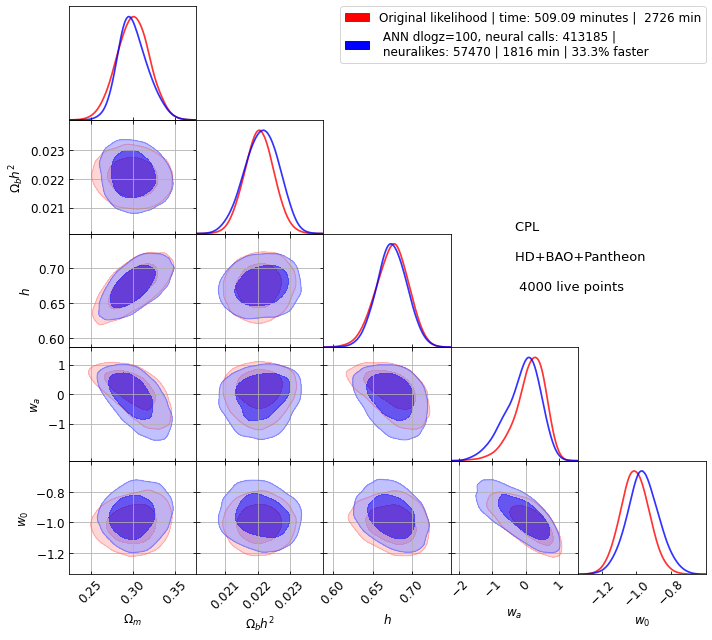

In [18]:
roots4 = ['waCDM_phy_CBAO+HD+Pantheon_nested_multi_4k',
          'waCDM_phy_CBAO+HD+Pantheon_nested_multi_neuralike_4k',
#           'waCDM_phy_CBAO+HD+Pantheon_nested_multi_neuralike_genetic_4k',
          
         ]

g = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.3,
                                             'smooth_scale_1D': 0.3, 
                                             'ignore_rows': 0.0})

#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


g.triangle_plot(roots4, ['Om','Obh2', 'h', 'wa', 'w'],                           
                diag1d_kwargs={'colors':['red', 'blue', 'green', 'purple'], 
                               'alphas':[0.8, 0.8, 0.8]},
                colors=['red', 'blue', 'green', 'purple'],
                alphas = [0.4, 0.6, 0.6],
                legend_labels=['Original likelihood | time: 509.09 minutes |  2726 min' , 
                               ' ANN dlogz=100, neural calls: 413185 | \n neuralikes: 57470 | 1816 min | 33.3% faster', 
#                                'ANN+genetic dlogz=114, mut 05 crossover 0.5 | time: 2173 min | 22.2% faster'
                              ],
                legend_loc='upper right',
                filled = True,
                normalized=False, shaded=False, 
#                 param_limits={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]},
                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

g.subplots[1,0].grid(True)
g.subplots[2,0].grid(True)
g.subplots[2,1].grid(True)
g.subplots[3,0].grid(True)
g.subplots[3,1].grid(True)
g.subplots[3,2].grid(True)
g.subplots[4,0].grid(True)
g.subplots[4,1].grid(True)
g.subplots[4,2].grid(True)
g.subplots[4,3].grid(True)


g.add_text('CPL \n\nHD+BAO+Pantheon \n\n 4000 live points', x= -0.5, y=2.8, fontsize=13)

plt.savefig('wacdm_corner_4klivepoints.png', dpi=100)
plt.savefig('wacdm_corner_4klivepoints.svg')